In [3]:
# Importar librerias standard de Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import XGate, RYGate, UGate
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import *

import numpy as np

service = QiskitRuntimeService(channel="local")

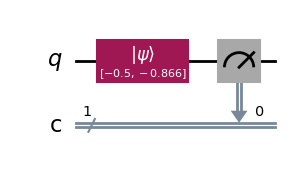

In [4]:
qubits = QuantumCircuit(1, 1)

#No hay forma de diferenciar dos qubits que difieren solamente por la fase global
#qubits.initialize([1/2, np.sqrt(3)/2], 0)
qubits.initialize([-1/2, -np.sqrt(3)/2], 0)

qubits.measure(0, 0)
qubits.draw(output="mpl")

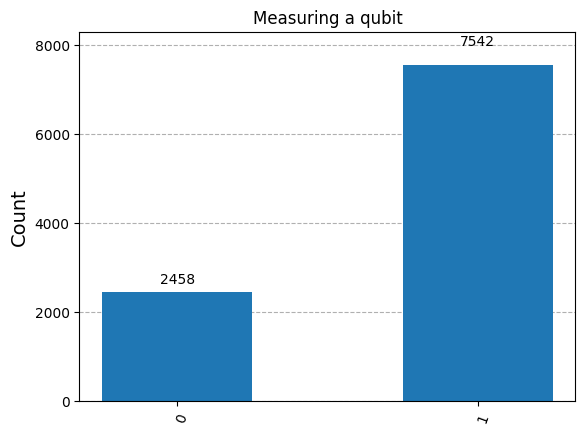

In [12]:
simulator = AerSimulator()
circuit = transpile(qubits, simulator)

result = simulator.run(circuit,shots=10000).result()
counts = result.get_counts()
plot_histogram(counts, title='Measuring a qubit')

In [ ]:
simulator = AerSimulator()
circuit1 = transpile(qubit1, simulator)
result = simulator.run(circuit1,shots=2000).result()
counts = result.get_counts()
plot_histogram(counts, title='Measuring qubit 1')

In [34]:
theta = 2*np.pi*np.random.random()
phi = 2*np.pi*np.random.random()
lam = 2*np.pi*np.random.random()

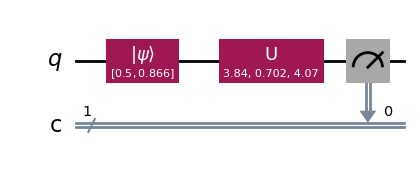

In [33]:
#Circuito 1: |X>

qubit1 = QuantumCircuit(1,1)
qubit1.initialize([1/2, np.sqrt(3)/2], 0)
qubit1.append(UGate(theta,phi,lam),[0])
qubit1.measure(0,0)
qubit1.draw(output="mpl")

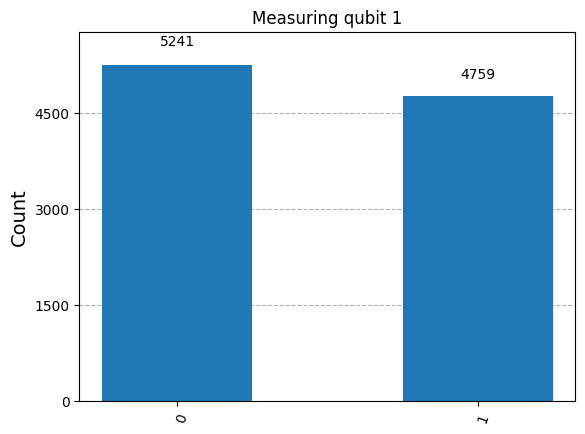

In [23]:
simulator = AerSimulator()
circuit1 = transpile(qubit1, simulator)

result = simulator.run(circuit1,shots=10000).result()
counts = result.get_counts()
plot_histogram(counts, title='Measuring qubit 1')

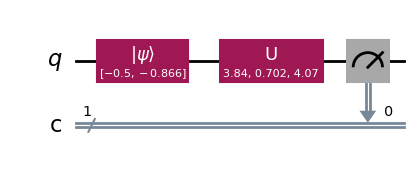

In [31]:
#Circuito 2: -|X>

qubit2 = QuantumCircuit(1,1)
qubit2.initialize([-1/2, -np.sqrt(3)/2], 0)
qubit2.append(UGate(theta,phi,lam),[0])
qubit2.measure(0,0)
qubit2.draw(output="mpl")

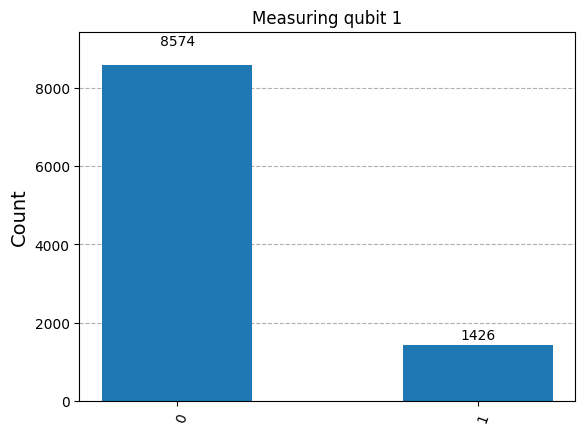

In [29]:
simulator = AerSimulator()
circuit2 = transpile(qubit2, simulator)

result = simulator.run(circuit1,shots=10000).result()
counts = result.get_counts()
plot_histogram(counts, title='Measuring qubit 1')

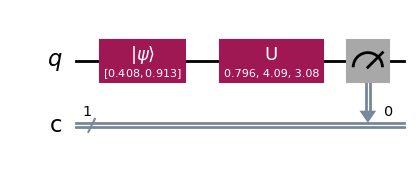

In [38]:
#Qbit random con U random
a = np.random.random()
b = np.sqrt(1-a**2)

theta = 2*np.pi*np.random.random()
phi = 2*np.pi*np.random.random()
lam = 2*np.pi*np.random.random()

qubit = QuantumCircuit(1, 1)
qubit.initialize([a,b], 0)
qubit.append(UGate(theta,phi,lam),[0])
qubit.measure(0,0)

qubit.draw(output="mpl")

In [42]:
backend = Aer.get_backend('statevector_simulator')

job = backend.run(qubit)
result = job.result()
outputstate = result.get_statevector(qubit, decimals=6)
display(array_to_latex(outputstate))

print(a**2+b**2, outputstate[0]*np.conj(outputstate[0])+outputstate[1]*np.conj(outputstate[1]))

<IPython.core.display.Latex object>

0.9999999999999999 (0.9999999604450001+0j)


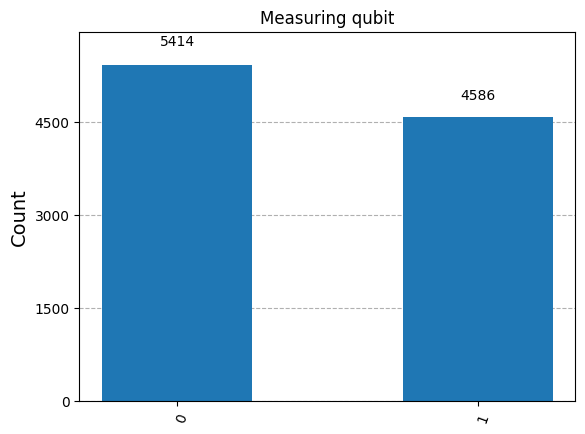

In [39]:
simulator = AerSimulator()
circuit = transpile(qubit, simulator)

result = simulator.run(circuit,shots=10000).result()
counts = result.get_counts()
plot_histogram(counts, title='Measuring qubit')